# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import matplotlib.ticker as ticker

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries=[]


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [3]:

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_obj = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city=city_obj.city_name
    country_code=city_obj.country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country_code)
        

# Print the city count to confirm sufficient count
city_count=len(cities)
cities[1],countries[1],city_count


('prince rupert', 'ca', 585)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
r_city_number=[]
r_date=[]
r_humidity=[]
r_lat=[]
r_lon=[]
r_max_temp=[]
r_wind_speed=[]
r_country=[]
r_city_name=[]
r_cloudiness=[]

In [7]:
#Try with one  sample

base_url="http://api.openweathermap.org/data/2.5/weather?"

city_code=cities[1]
#url=base_url + "appid=" + api_key + "&q=" + city_code
params={'q':city_code,'appid':api_key,'units':'Imperial'}


#response=requests.get(url).json()
response2=requests.get(base_url,params=params).json()
print(json.dumps(response2,indent=4,sort_keys=True))




{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 54.32,
        "lon": -130.32
    },
    "dt": 1569971060,
    "id": 6113406,
    "main": {
        "humidity": 58,
        "pressure": 1015,
        "temp": 55.4,
        "temp_max": 55.4,
        "temp_min": 55.4
    },
    "name": "Prince Rupert",
    "sys": {
        "country": "CA",
        "id": 883,
        "message": 0.0078,
        "sunrise": 1569940986,
        "sunset": 1569982719,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 14484,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "gust": 21.92,
        "speed": 12.75
    }
}


In [8]:
#print required data for one sample un above line
a=response2["main"]["humidity"]
b=response2["main"]["temp_max"]
c=response2["wind"]["speed"]
d=response2["dt"]
e=response2["sys"]["country"]
f=response2["id"]
g=response2['coord']['lat']
h=response2['coord']['lon']
k=response2['name']
m=response2["clouds"]["all"]
a,b,c,d,e,f,g,h,k,m

(58,
 55.4,
 12.75,
 1569971060,
 'CA',
 6113406,
 54.32,
 -130.32,
 'Prince Rupert',
 90)

In [9]:

# call API and get the data 

base_url="http://api.openweathermap.org/data/2.5/weather?"
record=0
print('Beginning Data Retrieval')
print('----')
while record <city_count:
    
    city_code=cities[record] 
    params={'q':city_code,'appid':api_key,'units':'Imperial'}
    try:
        response2=requests.get(base_url,params=params).json()

        r_humidity.append(response2["main"]["humidity"])
        r_max_temp.append(response2["main"]["temp_max"])
        r_wind_speed.append(response2["wind"]["speed"])
        r_date.append(response2["dt"])
        r_country.append(response2["sys"]["country"])
        r_city_number.append(response2["id"])
        r_lat.append(response2['coord']['lat'])
        r_lon.append(response2['coord']['lon'])
        r_city_name.append(response2['name'])
        r_cloudiness.append(response2['clouds']['all'])
        print(f"Processing Record {record} | {city_code},id is {response2['id']}")
    except:
        print("City not found. Skipping...")
    record+=1
    #time.sleep(1)
    #if record%50==0:
    #   time.sleep(10)
print('----')
print('Data Retrieval Complete ')
print('----')
    


Beginning Data Retrieval
----
City not found. Skipping...
Processing Record 1 | prince rupert,id is 6113406
Processing Record 2 | aripuana,id is 3665202
Processing Record 3 | hermanus,id is 3366880
Processing Record 4 | kapaa,id is 5848280
Processing Record 5 | namatanai,id is 2090021
City not found. Skipping...
Processing Record 7 | punta arenas,id is 3874787
Processing Record 8 | vila franca do campo,id is 3372472
Processing Record 9 | chokurdakh,id is 2126123
Processing Record 10 | sangar,id is 2017215
Processing Record 11 | ponta do sol,id is 3453439
City not found. Skipping...
Processing Record 13 | narsaq,id is 3421719
Processing Record 14 | toamasina,id is 1053384
Processing Record 15 | tiksi,id is 2015306
Processing Record 16 | los llanos de aridane,id is 2514651
Processing Record 17 | east london,id is 1006984
City not found. Skipping...
Processing Record 19 | kruisfontein,id is 986717
Processing Record 20 | port hardy,id is 6111862
Processing Record 21 | coihaique,id is 38944

Processing Record 184 | talnakh,id is 1490256
Processing Record 185 | muros,id is 3115824
Processing Record 186 | khash,id is 1160571
Processing Record 187 | fort smith,id is 4111410
Processing Record 188 | hit,id is 95788
Processing Record 189 | grand-lahou,id is 2288105
Processing Record 190 | iqaluit,id is 5983720
Processing Record 191 | natal,id is 3394023
Processing Record 192 | chitral,id is 1181065
Processing Record 193 | caucaia,id is 3402429
Processing Record 194 | sabinov,id is 723674
Processing Record 195 | inhambane,id is 1045114
Processing Record 196 | emerald,id is 2167426
Processing Record 197 | beringovskiy,id is 2126710
City not found. Skipping...
Processing Record 199 | abu kamal,id is 174448
Processing Record 200 | carnarvon,id is 1014034
Processing Record 201 | geraldton,id is 5960603
Processing Record 202 | marsh harbour,id is 3571913
Processing Record 203 | castro,id is 3896218
Processing Record 204 | kouroussa,id is 2418437
Processing Record 205 | huilong,id is 1

Processing Record 364 | college,id is 5859699
City not found. Skipping...
City not found. Skipping...
Processing Record 367 | kushima,id is 1895695
Processing Record 368 | la rioja,id is 3848950
Processing Record 369 | marawi,id is 1701054
City not found. Skipping...
Processing Record 371 | cayenne,id is 3382160
Processing Record 372 | verkhoyansk,id is 2013465
Processing Record 373 | riverton,id is 5836665
City not found. Skipping...
Processing Record 375 | naze,id is 2337542
City not found. Skipping...
Processing Record 377 | edd,id is 338345
Processing Record 378 | gogaran,id is 616659
Processing Record 379 | ishigaki,id is 1861416
Processing Record 380 | ancud,id is 3899695
Processing Record 381 | manicore,id is 3663503
City not found. Skipping...
Processing Record 383 | bereda,id is 3105522
Processing Record 384 | beidao,id is 1816751
Processing Record 385 | dakoro,id is 2446267
Processing Record 386 | ningxiang,id is 1799352
Processing Record 387 | motygino,id is 1498314
Processi

Processing Record 544 | tual,id is 1623197
Processing Record 545 | lompoc,id is 5367788
Processing Record 546 | jhalida,id is 1269026
Processing Record 547 | kalmunai,id is 1242110
Processing Record 548 | kathmandu,id is 1283240
Processing Record 549 | bonfim,id is 3379316
Processing Record 550 | wewak,id is 2083537
Processing Record 551 | manoharpur,id is 1263651
Processing Record 552 | moyale,id is 186180
Processing Record 553 | paita,id is 3694112
Processing Record 554 | filingue,id is 2444995
Processing Record 555 | birao,id is 240210
Processing Record 556 | sinnamary,id is 3380290
Processing Record 557 | dauriya,id is 2025099
Processing Record 558 | lima,id is 3936456
Processing Record 559 | tura,id is 2014833
Processing Record 560 | cradock,id is 1012600
Processing Record 561 | republic,id is 5808201
Processing Record 562 | khani,id is 610864
Processing Record 563 | hamilton,id is 5969785
Processing Record 564 | camacha,id is 2270385
Processing Record 565 | marsa matruh,id is 352

In [12]:
#How many records I get
len(r_humidity)

532

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#r_max_temp_f=[(int(i)-273.15)*9/5+32 for i in r_max_temp] 
weather_dic={"City":r_city_name,"Cloudiness":r_cloudiness,"Country":r_country,"Date":r_date,"Humidity":r_humidity,
            "Lat":r_lat,"Lon":r_lon,"Max_temp":r_max_temp,"Wind_speed":r_wind_speed}
weather_df=pd.DataFrame(data=weather_dic)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max_temp,Wind_speed
0,Prince Rupert,90,CA,1569971060,58,54.32,-130.32,55.40,12.75
1,Aripuana,100,BR,1569971378,95,-9.17,-60.63,72.54,1.48
2,Hermanus,100,ZA,1569971378,77,-34.42,19.24,60.01,8.01
3,Kapaa,40,US,1569971264,66,22.08,-159.32,86.00,17.22
4,Namatanai,100,PG,1569971379,79,-3.66,152.44,79.54,6.78


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [15]:
# convert report date to the readbale date
report_date=max(r_date)
from datetime import datetime
ts = int(report_date)

report_date_l=datetime.utcfromtimestamp(ts).strftime('%m/%d/%Y')
report_date_l

'10/01/2019'

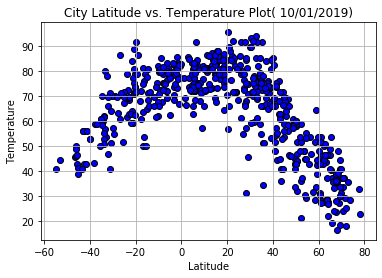

In [26]:
fig, ax = plt.subplots()

ax.scatter(weather_df.Lat,weather_df.Max_temp,marker="o",color="b",edgecolors="k")
ax.grid()
ax.set( xlabel='Latitude', ylabel='Temperature',title=f'City Latitude vs. Temperature Plot( {report_date_l})')

!mkdir Output 
plt.savefig("./Output/LT_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

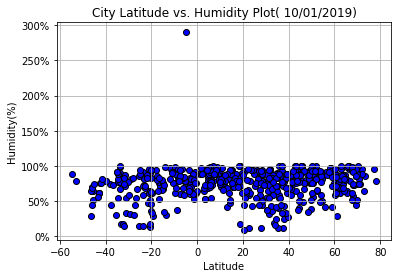

In [27]:

fig, ax = plt.subplots()
ax.scatter(weather_df.Lat,weather_df.Humidity,marker="o",color="b",edgecolors="k")
ax.grid()
ax.set( xlabel='Latitude', ylabel='Humidity(%)',title=f'City Latitude vs. Humidity Plot( {report_date_l})')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))

plt.savefig("./Output/LT_Humidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

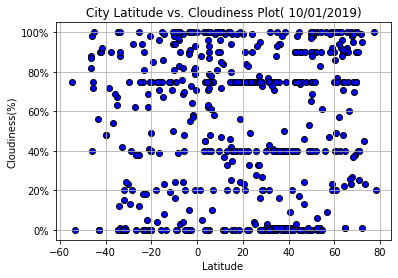

In [31]:
fig, ax = plt.subplots()

ax.scatter(weather_df.Lat,weather_df.Cloudiness,marker="o",color="b",edgecolors="k")
ax.grid()
ax.set( xlabel='Latitude ', ylabel='Cloudiness(%)',title=f'City Latitude vs. Cloudiness Plot( {report_date_l})')
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

plt.savefig("./Output/LT_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

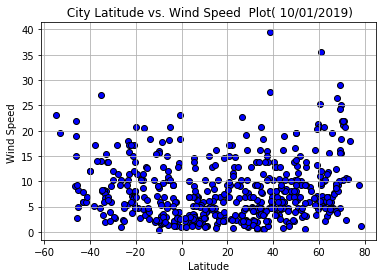

In [30]:
fig, ax = plt.subplots()

ax.scatter(weather_df.Lat,weather_df.Wind_speed,marker="o",color="b",edgecolors="k")
ax.grid()
ax.set( xlabel='Latitude', ylabel='Wind Speed ',title=f' City Latitude vs. Wind Speed  Plot( {report_date_l})')

plt.savefig("./Output/LT_Windspeed.png")
plt.show()

# Analyses 

## TEMP. VS LAT
* There should be good relation between these two .Near 0 LAT , TEMP is higher and when you go in both side you can see decrease in tempaeture. Ifound this in Google:
* Latitude is one of the main factors affecting temperature. Latitude is the measurement of the distance of a location on the Earth from the equator. The further away from the equator that you are the less sunlight that this location receives. This has to do with the shape of the earth.

##  Humidity. VS LAT
* Humidity is mostly betwnn 50 o 100% of Humidity .Except one point that I think it should be Outlier , probably wrong measurement or data Entry.
* between 20 to 40 both side of  Latitude there are more varaiety of  Humidity from wet to dry . 
* However I can  not see very clear relationship between this two elemnt .

## Cloudiness VS LAT
* Cloudinees seems to be randomy dustributed around all of the Latitudes.I can not see any relationship between these two.

## Wind Speed VS LAT
* wind speed is mostly same amount   for all the Latitude.)(speed 0 to 10)
* near the 0 point (equator ) seems to belower and more wind speed when we moved to north pr south pole .
* more windy placeamount increased when we move  to the poles (20,25,30,40 wind speed) 

 ## Overall
* There are less cities after +70 an before -60 .They should be very cold and near the poles so not too much cities .